In [2]:
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
def find_nearest(array, value):
#     time_array = pd.to_datetime(time_array)
    idt = (np.abs(array - value)).argmin()
    value = array[idt]
    return idt, value


# find_nearest(new_d['Height'].values[0,:], 0)

In [5]:
def get_AMB_APB(data, channel):
    '''
    Extraire les données nécessaires à utiliser et renommer 
        AMB = Attenuated Molecular Backscatter
        ATB = Attenuated Backscatter
        MMB = Model Molecular Backscatter
        MPB = Model Particular Backscatter
        MME = Model Molecular Extinction
        MPE = Model Particular Extinction 
    '''
    if channel == 355: 
        config_data_vars = {
            f'LNG_Molecular_Parallel_Attenuated_Backscatter_{channel}':'AMB',
            f'LNG_Particulate_Parallel_Attenuated_Backscatter_{channel}':'ATB',
            f'Model_Molecular_Backscatter_{channel}':'MMB',
            f'Model_Molecular_Extinction_{channel}':'MME',
            'Height' : 'Height', 
            'Time' : 'Time'
        }
    else:
        config_data_vars = {
            f'LNG_Total_Attenuated_Backscatter_{channel}':'ATB',
            f'Model_Molecular_Backscatter_{channel}':'MMB',
            f'Model_Molecular_Extinction_{channel}':'MME',
            'Height' : 'Height',
            'Time' : 'Time'
        }
#     config_data_vars = [f'LNG_Molecular_Parallel_Attenuated_Backscatter_{channel}', 
#                        f'LNG_Particulate_Parallel_Attenuated_Backscatter_{channel}',
#                        f'Model_Molecular_Backscatter_{channel}',
#                        'Height']
#     print(config_data_vars.keys())
    data = data.where((data['Validity_rate']==1) & ((d['LNG_UpDown']==1) | (d['LNG_UpDown']==2)), drop=False)
    tmp_data = data[list(config_data_vars.keys())]
    tmp_data = tmp_data.rename_vars(config_data_vars)
    return tmp_data


In [6]:
listfiles = sorted(Path('/homedata/nmpnguyen/LNG/NETCDF/').glob('*.nc'))
listfiles

[PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210908_F5_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210910_F6_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F8_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210914_F9_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210916_F10_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210917_F11_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210918_F12_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210919_F13_rg_err_ntirs100.nc')]

In [7]:
d = xr.open_dataset(listfiles[3],decode_cf=False)

d['Height'].where((d['Validity_rate']==1) & ((d['LNG_UpDown']==1) | (d['LNG_UpDown']==2)), drop=True)

<xarray.DataArray 'Height' (time: 710, height: 3500)>
array([[ 1.3508582 ,  1.3567897 ,  1.3627211 , ..., 22.093904  ,
        22.099834  , 22.105766  ],
       [ 1.4700394 ,  1.4759597 ,  1.4818798 , ..., 22.173815  ,
        22.179735  , 22.185656  ],
       [ 1.553462  ,  1.5593864 ,  1.5653108 , ..., 22.271872  ,
        22.277794  , 22.28372   ],
       ...,
       [-0.7429554 , -0.73696387, -0.7309723 , ..., 20.210215  ,
        20.216206  , 20.222198  ],
       [-0.74330884, -0.73731667, -0.7313245 , ..., 20.212057  ,
        20.218048  , 20.224043  ],
       [-0.74360454, -0.7376123 , -0.7316201 , ..., 20.211895  ,
        20.217886  , 20.223879  ]], dtype=float32)
Dimensions without coordinates: time, height
Attributes:
    _FillValue:     -999.0
    units:          km
    long_name:      Lidar gate altitude
    missing_value:  -999.0

In [14]:
find_nearest(d['Time'].values, 60000)[0], d['Time']

(1218,
 <xarray.DataArray 'Time' (time: 2109)>
 array([53700.016, 53700.016, 53700.016, ..., 64832.516, 64837.543, 64842.637],
       dtype=float32)
 Dimensions without coordinates: time
 Attributes:
     _FillValue:     -999.0
     units:          Sec UTC
     long_name:      Second UTC since midnight
     missing_value:  -999.0)

In [7]:
new_dd = get_AMB_APB(d, 532)
new_d = get_AMB_APB(d, 355)


In [8]:
idt = np.where(~np.isnan(new_d['Time']).all(axis=1))
idt

(array([  50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
          61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
          83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
          94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
         105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
         116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
         127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
         138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
         149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
         160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  184,  185,  186,  187,  188,  189,  190,  191,  192,
         193,  194,  195,  196,  197, 

In [9]:
# trouver les index où se trouve Height = 0, en 2 directions 
#-----------------------------------------------------------
# de haut en bas
#---------------
sol_ind = [find_nearest(d['Height'][r,:].values, 0.0) for r in range(d['Height'].shape[0])]

alt_aircraft_ind = [find_nearest(d['Height'][r,:].values, d['Aircraft_Altitude'].values[r]-0.2) for r in range(d['Height'].shape[0])]
print(alt_aircraft_ind[500], sol_ind[500])

# de bas en haut 
#---------------
# sol_ind_inv = []
# for ind, i in zip(sol_ind, range(591)):
#     # vérifier avec le sens de haut en bas 
#     print(ind[1], i)
#     print(new_d['Height'][i, -(new_d['Height'].shape[1] - ind[0])].values)
#     sol_ind_inv.append((new_d['Height'].shape[1] - ind[0]))



(170, 4.001549) (890, 0.0008033564)


In [18]:
idt = np.where(~np.isnan(new_d['Time']).all(axis=1))[0]
len(idt)

710

In [11]:
C = (-np.log(new_d['AMB']/new_d['MMB'])/2).values # --> transmittance 2 way
A = np.full(new_d['Height'].shape, 0.0) 
PartExt355 = np.full(new_d['Height'].shape, np.nan)

# for k in range(1, d['Height'].shape[1]):
#     delta_z = np.abs(d['Height'][:, k-1] - d['Height'][:, k]).values*1e3
#     A[:, k] = ((C[:, k] - C[:, k-1])/(delta_z))

# PartExt355 = A - new_d.MME.values
from tqdm import tqdm
for t in tqdm(idt): #d['Time'].values.shape[0]
    depart = alt_aircraft_ind[t][0]
    fin = sol_ind[t][0]
#     for k in range(depart, fin): #d['Height'].shape[1]
#         delta_z = np.abs(d['Height'][t, k-1] - d['Height'][t, k]).values*1e3
#         A[t, k] = ((C[t, k] - C[t, k-1])/(delta_z))
    if fin == 0: 
        delta_z = np.abs(new_d['Height'][t, depart-1:fin-1] - new_d['Height'][t, depart:]).values*1e3
        A[t, depart:] = ((C[t, depart:] - C[t, depart-1:fin-1])/(delta_z))
    else: 
        delta_z = np.abs(new_d['Height'][t, depart-1:fin-1] - new_d['Height'][t, depart:fin]).values*1e3
        A[t, depart:fin] = ((C[t, depart:fin] - C[t, depart-1:fin-1])/(delta_z))
    
PartExt355 = A - new_d.MME.values

/net/nfs/tools/python-anaconda/3.8/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
100%|██████████| 710/710 [00:00<00:00, 817.76it/s]


In [12]:
# Particular Backscatter 355 without attenuation 
PartBack355 = (new_d['ATB']*new_d['MMB'])/new_d['AMB']
PartBack355.dropna(dim='time', how='all')

# plt.pcolormesh(d['Time'].values, d['Height'].values.T, PartBack355.values.T,
#               norm=LogNorm(vmin=1e-6))
# plt.colorbar(label='PartBack355')
# plt.ylim(0,5)
# plt.xlim(54000, 56000)

<xarray.DataArray (time: 710, height: 3500)>
array([[6.8917288e-06, 6.8861409e-06, 6.8804948e-06, ..., 2.1337182e-06,
        2.1337182e-06, 2.1337182e-06],
       [6.7823566e-06, 6.7767687e-06, 6.7711808e-06, ..., 2.1337182e-06,
        2.1337182e-06, 2.1337182e-06],
       [6.7154178e-06, 6.7115761e-06, 6.7077344e-06, ..., 2.1337182e-06,
        2.1337182e-06, 2.1337182e-06],
       ...,
       [7.8266603e-06, 7.8266603e-06, 7.8266603e-06, ..., 2.1322048e-06,
        2.1322048e-06, 2.1322048e-06],
       [7.8266603e-06, 7.8266603e-06, 7.8266603e-06, ..., 2.1322048e-06,
        2.1322048e-06, 2.1322048e-06],
       [7.8266603e-06, 7.8266603e-06, 7.8266603e-06, ..., 2.1322048e-06,
        2.1322048e-06, 2.1322048e-06]], dtype=float32)
Dimensions without coordinates: time, height

In [13]:
# fig, (ax, ax2) = plt.subplots(figsize=(15,5), ncols=2)
# p = ax.pcolormesh(d['Time'].values, d['Height'].values.T, new_d['AMB'].values.T, norm=LogNorm(1e-6))
# ax.plot(d['Time'].values, d['Aircraft_Altitude'].values, color='k')
# plt.colorbar(p, ax=ax, label='AMB355')
# ax.set_ylim(0,5)
# ax.set_xlim(54000, 56000)

# p2 = ax2.pcolormesh(d['Time'].values, d['Height'].values.T, new_d['MMB'].values.T, norm=LogNorm(1e-6))
# ax2.plot(d['Time'].values, d['Aircraft_Altitude'].values, color='k')
# plt.colorbar(p2, ax=ax2, label='MMB355')
# ax2.set_ylim(0,5)
# ax2.set_xlim(54000, 56000)

In [14]:

# %matplotlib inline
# fig, (ax4, ax5) = plt.subplots(ncols=2, figsize=(12,5))
# # p4 = ax4.pcolormesh(d['Time'].values, d['Height'].values.T, new_d.MME.values.T, norm=LogNorm(vmin=1e-5))
# p4 = ax4.pcolormesh(d['Time'].values, d['Height'].values.T, A.T, norm=LogNorm(vmin=1e-5, vmax=1e-2))
# plt.colorbar(p4, ax=ax4, label = 'molecular extinction 355, m-1')
# ax4.set_ylim(0, 10)
# ax4.set_xlim(54000, 56000)

# p5 = ax5.pcolormesh(d['Time'].values, d['Height'].values.T, PartExt355.T, norm=LogNorm(vmin=1e-5, vmax=1e-2))
# plt.colorbar(p5, ax=ax5, label='particular extinction 355, m-1')
# ax5.set_ylim(0, 10)
# ax5.set_xlim(54000, 56000)

In [15]:
# plt.semilogx(PartExt355[70,:], d['Height'][70,:], label='particular extinction 355')
# plt.semilogx(new_d.MME.values[70,:], d['Height'][70,:], label='molecular extinction 355')
# plt.legend()
# plt.ylim(-1, 10)
# plt.xlim(-1, 100)

In [16]:
# for i in range(d['Time'].shape[0]):
#     if np.isnan(d['Height'][i,:]).all():
#         print(f'skip {i}')
#     else:
#         PartExt355[i, find_nearest(d['Height'][i,:].values, 0.0)[0]:] = np.nan

<ipython-input-17-172f7990d0a5>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmap.set_under('lightgrey')
<ipython-input-17-172f7990d0a5>:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmap.set_over('dimgrey')
<ipython-input-17-172f7990d0a5>:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p = a0.pcolorm

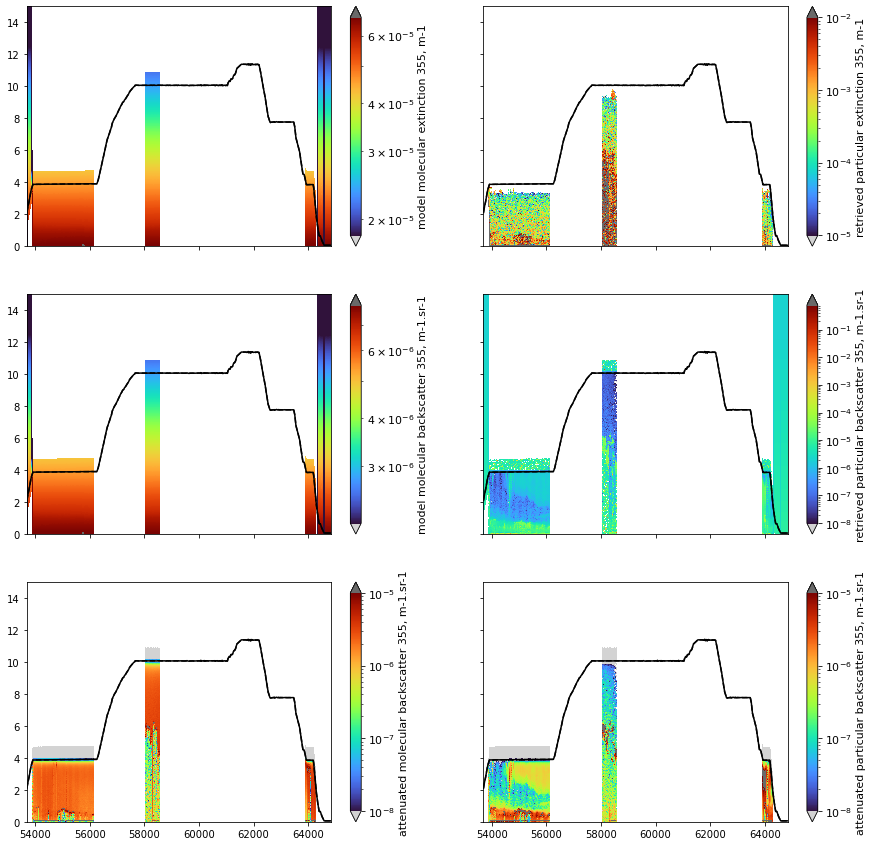

In [17]:

fig, ((a0, a1), (a2, a3), (a4, a5)) = plt.subplots(ncols=2, nrows=3, figsize=(15, 15), sharex=True, sharey=True)
plt.rcParams['pcolor.shading'] = 'auto'
plt.rcParams['font.size']=11

cmap = plt.cm.turbo
cmap.set_under('lightgrey')
cmap.set_over('dimgrey')

p = a0.pcolormesh(d['Time'].values, d['Height'].values.T, new_d['MME'].values.T, norm=LogNorm(), cmap=cmap)
plt.colorbar(p, ax=a0, label = 'model molecular extinction 355, m-1', extend='both')
a0.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a0.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
a0.set_ylim(0, 15)
# a0.set_xlim(54000, 56000)

p = a1.pcolormesh(d['Time'].values, d['Height'].values.T, PartExt355.T, norm=LogNorm(vmin=1e-5, vmax=1e-2), cmap=cmap)
plt.colorbar(p, ax=a1, label='retrieved particular extinction 355, m-1', extend='both')
a1.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a1.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
a1.set_ylim(0, 15)
# a1.set_xlim(54000, 56000)

p = a2.pcolormesh(d['Time'].values, d['Height'].values.T, new_d['MMB'].values.T, norm=LogNorm(), cmap=cmap)
plt.colorbar(p, ax=a2, label='model molecular backscatter 355, m-1.sr-1', extend='both')  
a2.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a2.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')

p = a3.pcolormesh(d['Time'].values, d['Height'].values.T, PartBack355.T, norm=LogNorm(vmin=1e-8), cmap=cmap)
plt.colorbar(p, ax=a3, label='retrieved particular backscatter 355, m-1.sr-1', extend='both')
a3.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a3.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')

p = a4.pcolormesh(d['Time'].values, d['Height'].values.T, new_d['AMB'].values.T, norm=LogNorm(vmin=1e-8, vmax=1e-5), cmap=cmap)
plt.colorbar(p, ax=a4, label='attenuated molecular backscatter 355, m-1.sr-1', extend='both')
a4.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a4.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')

p = a5.pcolormesh(d['Time'].values, d['Height'].values.T, new_d['ATB'].values.T, norm=LogNorm(vmin=1e-8, vmax=1e-5), cmap=cmap)
plt.colorbar(p, ax=a5, label='attenuated particular backscatter 355, m-1.sr-1', extend='both')
a5.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a5.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')

In [ ]:
Path('/homedata/nmpnguyen/LNG/test_Artem', f'{listfiles[2].stem}_Fig2.png')

In [19]:
const_sr532_esti = (new_dd.MMB + PartBack355)/new_dd.MMB


# fig, ax = plt.subplots()
# p = ax.pcolormesh(d['Time'].values, d['Height'].values.T, const_sr532_esti.T, 
#                   norm=LogNorm(vmax=1e2))
# plt.colorbar(p, ax=ax, label='(MMB532 + MPB355)/MMB532')
# ax.set_ylim(0, 10)
# ax.set_xlim(54000, 56000)

In [20]:
%%time

alpha532 = new_dd['MME'].values
alpha532_integ = np.full(alpha532.shape, 0.0)
T2_532 = np.full(alpha532.shape, np.nan)
##height : 4km -> -16km, 
alpha532_integ[:, 0] = alpha532[:, 0]

for t in tqdm(idt): #d['Time'].values.shape[0]
    depart = alt_aircraft_ind[t][0]
    fin = sol_ind[t][0]
#     for k in range(depart, fin): 
#         delta_z = np.abs(d['Height'][t, k] - d['Height'][t, k-1]).values*1e3
#         alpha532_integ[t, k] = np.nansum(alpha532_integ[t, k-1] + delta_z*alpha532[t, k])
#         T2_532[t, k] = np.exp(-2 * alpha532_integ[t, k])
    if fin == 0: 
        delta_z = np.abs(d['Height'][t, depart-1:fin-1] - d['Height'][t, depart:]).values*1e3
        alpha532_integ[t, depart:] = delta_z*alpha532[t, depart:]
        alpha532_integ[t, depart:] = alpha532_integ[t, depart:] + alpha532_integ[t, depart-1:fin-1]
        T2_532[t, depart:] = np.exp(-2 * alpha532_integ[t, depart:])
    else:    
        delta_z = np.abs(d['Height'][t, depart-1:fin-1] - d['Height'][t, depart:fin]).values*1e3
        alpha532_integ[t, depart:fin] = delta_z*alpha532[t, depart:fin]
        alpha532_integ[t, depart:fin] = alpha532_integ[t, depart:fin] + alpha532_integ[t, depart-1:fin-1]
        T2_532[t, depart:fin] = np.exp(-2 * alpha532_integ[t, depart:fin])

100%|██████████| 710/710 [00:01<00:00, 657.31it/s]

CPU times: user 1.12 s, sys: 20 ms, total: 1.14 s
Wall time: 1.13 s


In [ ]:
# plt.semilogx(alpha532_integ[70,:], d['Height'][70,:], label='molecular extinction 532 integr')
# plt.semilogx(alpha532[70,:], d['Height'][70,:], label='molecular extinction 532')
# plt.legend()
# plt.ylim(-1, 10)

In [ ]:
# fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(11,5))
# p = ax.pcolormesh(d['Time'].values, d['Height'].values.T, alpha532_integ.T, 
#                   norm=LogNorm(), shading='auto')
# plt.colorbar(p, ax=ax, label='integration moleculaire extinction 532')
# ax.set_ylim(0, 12)

# p = ax2.pcolormesh(d['Time'].values, d['Height'].values.T, np.exp(-2*alpha532_integ).T, 
#                   norm=LogNorm(), shading='auto')
# plt.colorbar(p, ax=ax2, label=' np.exp(-2* moleculaire extinction 532)')
# ax2.set_ylim(0, 12)

# ax2.semilogx(e532_integ[100, :], new_d['Height'][100, :])
# ax2.set_ylim(0, 12)

In [21]:
etotal = np.nansum(np.dstack((alpha532, 0.9*PartExt355)),2)
etotal_interg = np.full(alpha532.shape, np.nan)
T2_total = np.full(alpha532.shape, np.nan)
# etotal_interg[:, 0] = etotal[:, 0]

for t in tqdm(idt): #d['Time'].values.shape[0]
    depart = alt_aircraft_ind[t][0]
    fin = sol_ind[t][0]
#     for k in range(depart, fin): 
#         delta_z = np.abs(d['Height'][t, k] - d['Height'][t, k-1]).values*1e3
#         etotal_interg[t, k] = etotal_interg[t, k-1] + delta_z*etotal[t, k]
#         T2_total[t, k] = np.exp(-2 * etotal_interg[t, k])
    if fin == 0 :
        delta_z = np.abs(d['Height'][t, depart-1:fin-1] - d['Height'][t, depart:]).values*1e3
        etotal_interg[t, depart:] = delta_z*etotal[t, depart:]
        etotal_interg[t, depart:] = etotal_interg[t, depart:] + etotal_interg[t, depart-1:fin-1]
        T2_total[t, depart:] = np.exp(-2 * etotal_interg[t, depart:])        
    else: 
        delta_z = np.abs(d['Height'][t, depart-1:fin-1] - d['Height'][t, depart:fin]).values*1e3
        etotal_interg[t, depart:fin] = delta_z*etotal[t, depart:fin]
        etotal_interg[t, depart:fin] = etotal_interg[t, depart:fin] + etotal_interg[t, depart-1:fin-1]
        T2_total[t, depart:fin] = np.exp(-2 * etotal_interg[t, depart:fin])

100%|██████████| 710/710 [00:01<00:00, 663.31it/s]


In [ ]:
plt.plot(T2_total[t, depart:fin], d['Height'][t, depart:fin].values)

In [ ]:
# cols_nan = []
# for i in range(d['Time'].shape[0]):
#     print(i, np.isnan(new_d['Height'][i,:]).all())
#     if np.isnan(new_d['Height'][i,:]).all():
#         cols_nan.append(i)

In [ ]:
# fig, (ax0, ax, ax2) = plt.subplots(ncols = 3, figsize=(16,5))
# p = ax0.pcolormesh(d['Time'].values, d['Height'].values.T, (alpha532+0.9*PartExt355).T,
#                   norm=LogNorm(vmin = 1e-5), shading='auto')
# plt.colorbar(p, ax=ax0, label='alpha mol 532 + 0.9*alpha part 355')
# ax0.set_ylim(0, 5)
# ax0.set_xlim(54000, 56000)

# # etotal_interg[cols_nan, :] = np.nan
# p = ax.pcolormesh(d['Time'].values, d['Height'].values.T, etotal_interg.T,
#                   shading='auto')
# plt.colorbar(p, ax=ax, label='integration (alpha mol 532 + alpha part 355)')
# ax.set_ylim(0, 5)
# ax.set_xlim(54000, 56000)

# p = ax2.pcolormesh(d['Time'].values, d['Height'].values.T, np.exp(-2*etotal_interg).T,
#                   norm=LogNorm(vmin = 1e-5), shading='auto')
# plt.colorbar(p, ax=ax2, label='exp(-2*integration (alpha mol 532 + alpha part 355))')
# ax2.set_ylim(0, 5)
# ax2.set_xlim(54000, 56000)

# ax2.plot(etotal[100, :], new_d['Height'][100, :], label='before')
# ax2.plot(etotal_interg[100, :], new_d['Height'][100, :], label='integrated')
# ax2.set_ylim(0, 12)
# ax2.legend()

In [22]:
# T2_total = np.exp(-2*etotal_interg)
# T2_532 = np.exp(-2*alpha532_integ)
t2 = T2_total/T2_532
# t2[np.isinf(t2)] = np.nan

SR532_esti = (const_sr532_esti*t2).values

print(t2,SR532_esti)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]] [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [186]:
config_data_vars = {
            'LNG_Molecular_Parallel_Attenuated_Backscatter_{channel}':'MPAB',
            'LNG_Particulate_Parallel_Attenuated_Backscatter_{channel}':'PPAB',
            'LNG_Parallel_Attenuated_Backscatter_{channel}':'ATB',
            'Model_Molecular_Backscatter_{channel}':'MMB',
            'Model_Molecular_Extinction_{channel}':'MME',
            'Model_Molecular_Transmittance_{channel}':'Tmol',
            'Height' : 'Height', 
            'Time' : 'Time'
        }
config_data_vars.update({'height':'km'})
config_data_vars

{'LNG_Molecular_Parallel_Attenuated_Backscatter_{channel}': 'MPAB',
 'LNG_Particulate_Parallel_Attenuated_Backscatter_{channel}': 'PPAB',
 'LNG_Parallel_Attenuated_Backscatter_{channel}': 'ATB',
 'Model_Molecular_Backscatter_{channel}': 'MMB',
 'Model_Molecular_Extinction_{channel}': 'MME',
 'Model_Molecular_Transmittance_{channel}': 'Tmol',
 'Height': 'Height',
 'Time': 'Time',
 'height': 'km'}

In [ ]:
plt.clf()
fig, ((a0, a1, a11), (a2, a3, a31), (a4, a5, a51)) = plt.subplots(ncols=3, nrows=3, figsize=(20, 15), sharex=True, sharey=True)
plt.rcParams['pcolor.shading'] = 'auto'
plt.rcParams['font.size']=11

cmap = plt.cm.turbo
cmap.set_under('lightgrey')
cmap.set_over('dimgrey')

p = a0.pcolormesh(d['Time'].values, d['Height'].values.T, alpha532.T, norm=LogNorm(vmin=6e-6, vmax=5e-5), cmap=cmap)
a0.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a0.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a0, label = 'AlphaMol 532\n(m-1)', extend='both')
a0.set_ylim(0, 15)
# a0.set_xlim(54000, 56000)

p = a1.pcolormesh(d['Time'].values, d['Height'].values.T, alpha532_integ.T, norm=LogNorm(vmin=1e-3, vmax=1e-1), cmap=cmap)
a1.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a1.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a1, label='AlphaMol 532 integrated\n(m-1)', extend='both')
a1.set_ylim(0, 15)
# a1.set_xlim(54000, 56000)

p = a11.pcolormesh(d['Time'].values, d['Height'].values.T, T2_532.T, norm=LogNorm(), cmap=cmap)
a11.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a11.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a11, label='exp(-2*(AlphaMol 532 integrated))\n(m-1)', extend='both')

p = a2.pcolormesh(d['Time'].values, d['Height'].values.T, etotal.T, norm=LogNorm(vmin=1e-6, vmax=5e-3), cmap=cmap)
a2.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a2.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a2, label='AlphaMol 532 + 0.9*AlphaPart355\n(m-1)', extend='both')  

p = a3.pcolormesh(d['Time'].values, d['Height'].values.T, etotal_interg.T, norm=LogNorm(vmin=1e-1, vmax=5e0), cmap=cmap)
a3.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a3.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a3, label='AlphaMol 532 + 0.9*AlphaPart355 integrated\n(m-1)', extend='both')

p = a31.pcolormesh(d['Time'].values, d['Height'].values.T, T2_total.T, norm=LogNorm(vmin=1e-1, vmax=1e1), cmap=cmap)
a31.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a31.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a31, label='exp -2(AlphaMol 532 + 0.9*AlphaPart355 integrated)\n(m-1)', extend='both')

p = a4.pcolormesh(d['Time'].values, d['Height'].values.T, const_sr532_esti.T, norm=LogNorm(vmin=1e0, vmax=1e2), cmap=cmap)
a4.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a4.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a4, label='(BackMol532 + BackPart355)/BackMol532', extend='both')

p = a5.pcolormesh(d['Time'].values, d['Height'].values.T, SR532_esti.T, norm=LogNorm(vmin=1e-1, vmax=1e2), cmap=cmap)
a5.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a5.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a5, label='SR532 estimated', extend='both')

p = a51.pcolormesh(d['Time'].values, d['Height'].values.T, (new_d.ATB/new_d.AMB).values.T, norm=LogNorm(vmin=1e-1, vmax=1e2), cmap=cmap)
a51.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k')
a51.plot(d['Time'].values, d['Aircraft_Altitude'].values, color = 'k', linestyle = '--')
plt.colorbar(p, ax=a51, label='SR532 mesured', extend='both')

In [ ]:
fig, ax = plt.subplots(figsize = (9,5))
p = ax.pcolormesh(d['Time'].values, d['Height'].values.T, (SR532_esti).T, cmap='turbo', 
                  norm=LogNorm())
plt.colorbar(p, ax=ax, label='SR532 estimated')
ax.set_ylim(0,15)
# ax.set_xlim(54000, 56000)

In [23]:
from sklearn.metrics import mean_absolute_error

predict = SR532_esti[np.logical_and(np.isfinite((new_dd.ATB/new_dd.MMB).values), np.isfinite(SR532_esti))]
real = (new_dd.ATB/new_dd.MMB).values[np.logical_and(np.isfinite((new_dd.ATB/new_dd.MMB).values), np.isfinite(SR532_esti))]
mean_absolute_error(real, predict)

331888855.47272414

In [ ]:
fig, ax = plt.subplots(figsize = (9,5))
p = ax.pcolormesh(d['Time'].values, d['Height'].values.T, (new_d.ATB/new_d.AMB).values.T, cmap='turbo', 
                  vmin=0, vmax=8)
plt.colorbar(p, ax=ax, label='SR 355 original')
ax.set_ylim(0,5)
ax.set_xlim(54000, 56000)

In [106]:
maes = []
days = []
predicts = []
reals = []
reals355 = []
for path in list(Path('/homedata/nmpnguyen/LNG/test_Artem/').glob('*100_dataset532.nc')):
    file = xr.open_dataset(path)
    try: 
        predict = file['SR532_estimated'].values[np.logical_and(np.isfinite((file['ATB']/file['MMB']).values), np.isfinite(file['SR532_estimated'].values))]
        real = (file['ATB']/file['MMB']).values[np.logical_and(np.isfinite((file['ATB']/file['MMB']).values), np.isfinite(file['SR532_estimated'].values))]
        print(mean_absolute_error(real, predict))
        predicts.append(predict)
        reals.append(real)
        maes.append(mean_absolute_error(real, predict))
        days.append(path.stem.split('_')[6])
    #         measured_classes = pd.interval_range(start=0, end=60, freq=2)
    #         pd_classed = pd.DataFrame(np.array([real, predict]).T, columns=['mesures', 'estimes'])
    #         pd_classed['mesures_range'] = pd.cut(pd_classed['mesures'], measured_classes)
    #         pd_classed['estimes_range'] = pd.cut(pd_classed['estimes'], measured_classes)
    #         pp_classed = pd_classed.groupby(["mesures_range", 'estimes_range']).size()
    #         pp_classed = pp_classed.unstack(0)
    #         pd_classed['absolute_error'] = (pd_classed['mesures'] - pd_classed['estimes']).abs()
    #         fig, ax = plt.subplots(figsize=(9,5))
    #         pd_classed.groupby(by = "mesures_range", as_index = False).mean().plot(x = 'mesures_range', y='absolute_error', ax=ax)
    #         ax.set_yscale('log')
    #         ax.set(xlabel='classe of values', ylabel='mean absolute error', title=f'{path.stem.split("_")[6]}')
    # #         ax.set_ylim(1e0, 5e5)
    #         plt.minorticks_on()
    #         plt.grid(True)
        path1 = Path('/homedata/nmpnguyen/LNG/test_Artem/', f'{path.stem.split("_dataset532")[0]}_dataset355.nc')
        file1 = xr.open_dataset(path1)
        real355 = (file1['ATB']/file1['AMB']).values[np.logical_and(np.isfinite((file['ATB']/file['MMB']).values), np.isfinite(file['SR532_estimated'].values))]
        reals355.append(real355)
    except:
        pass

predicts = np.concatenate(predicts)
reals = np.concatenate(reals)
reals355 = np.concatenate(reals355)

1804286.033386174
20126341.708030373
5671569.6012694
737981.5200769122
1206353.0097037489
137307.27678686497


Text(0.5, 1.0, 'LNG Nadir - test Artem')

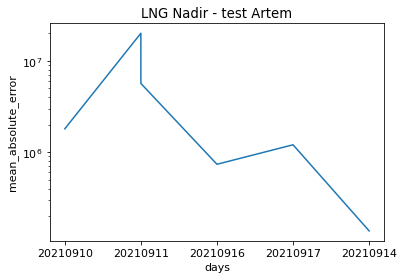

In [95]:
plt.semilogy(days, maes)
plt.xlabel('days')
plt.ylabel('mean_absolute_error')
plt.title('LNG Nadir - test Artem')

In [180]:
measured_classes = pd.interval_range(start=0, end=80, freq=2)
pd_classed = pd.DataFrame(np.array([reals, predicts]).T, columns=['mesures', 'estimes'])
pd_classed['mesures_range'] = pd.cut(pd_classed['mesures'], measured_classes)
pd_classed['estimes_range'] = pd.cut(pd_classed['estimes'], measured_classes)
pd_classed['absolute_error'] = (pd_classed['mesures'] - pd_classed['estimes']).abs()

# heat map 

pd_classed_prob = pd_classed.groupby(["mesures_range", 'estimes_range']).size()
pd_classed_prob = pd_classed_prob.unstack(0)
pd_classed_prob2 = pd_classed_prob
for i in range(pd_classed_prob.shape[0]):
    pd_classed_prob2.iloc[i] = 100*pd_classed_prob.iloc[:,i]/pd_classed_prob.iloc[:,i].sum()
    
# pd_classed_prob2

In [181]:
pd_classed_prob = pd_classed.groupby(["mesures_range", 'estimes_range']).size().unstack(0)
100*pd_classed_prob.iloc[:,i]/pd_classed_prob.iloc[:,i].sum()

estimes_range
(0, 2]      5.611511
(2, 4]      1.151079
(4, 6]      2.446043
(6, 8]      2.158273
(8, 10]     3.453237
(10, 12]    4.604317
(12, 14]    4.892086
(14, 16]    4.892086
(16, 18]    5.323741
(18, 20]    3.741007
(20, 22]    5.035971
(22, 24]    4.892086
(24, 26]    4.460432
(26, 28]    4.604317
(28, 30]    2.877698
(30, 32]    4.604317
(32, 34]    3.453237
(34, 36]    4.604317
(36, 38]    2.877698
(38, 40]    3.165468
(40, 42]    2.733813
(42, 44]    2.589928
(44, 46]    2.158273
(46, 48]    1.870504
(48, 50]    1.582734
(50, 52]    1.726619
(52, 54]    0.719424
(54, 56]    1.151079
(56, 58]    1.438849
(58, 60]    1.007194
(60, 62]    0.431655
(62, 64]    0.719424
(64, 66]    0.863309
(66, 68]    0.143885
(68, 70]    0.431655
(70, 72]    0.287770
(72, 74]    0.143885
(74, 76]    0.287770
(76, 78]    0.863309
(78, 80]    0.000000
Name: (78, 80], dtype: float64

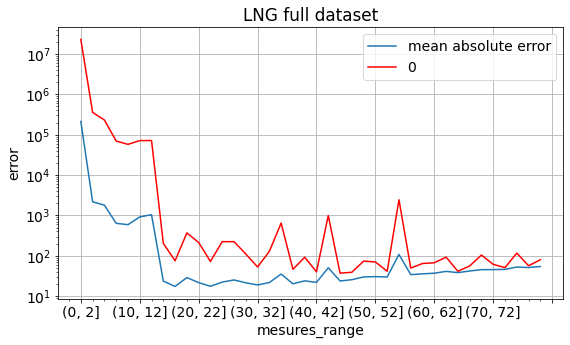

In [183]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm

fig=plt.figure(figsize=(14,5))
gs = GridSpec(ncols=3, nrows=1)
ax = fig.add_subplot(gs[0, :2])
pd_classed.groupby(by = "mesures_range", as_index = False).mean().plot(x = 'mesures_range', y='absolute_error', ax=ax, label='mean absolute error')
ax.set_yscale('log')
ax.set(xlabel='classe of measured values', ylabel='error', title=f'LNG full dataset')
#         ax.set_ylim(1e0, 5e5)
# ax2 = ax.twinx()
new_pd_classed.plot(x='mesures_range', label='rmse', color='red', ax=ax)
# ax2.set_yscale('log')
ax.legend()
plt.minorticks_on()
plt.grid(True)
# ax1 = fig.add_subplot(gs[0, 2])
# h = ax1.hist2d(reals, predicts, norm=LogNorm(vmax=1e4), bins=100, range=[[-1,60], [-1,60]])
# cb = plt.colorbar(h[3], ax=ax1, extend='both')
# ax1.set(#title=f'ER2: SR532 measured vs SR532 predicted \n', 
#         ylabel='SR532 predicted', xlabel='SR532 measured')


Text(0.5, 1.0, 'LNG: the density of the intervals of the estimated values \naccording to the intervals of the measurements')

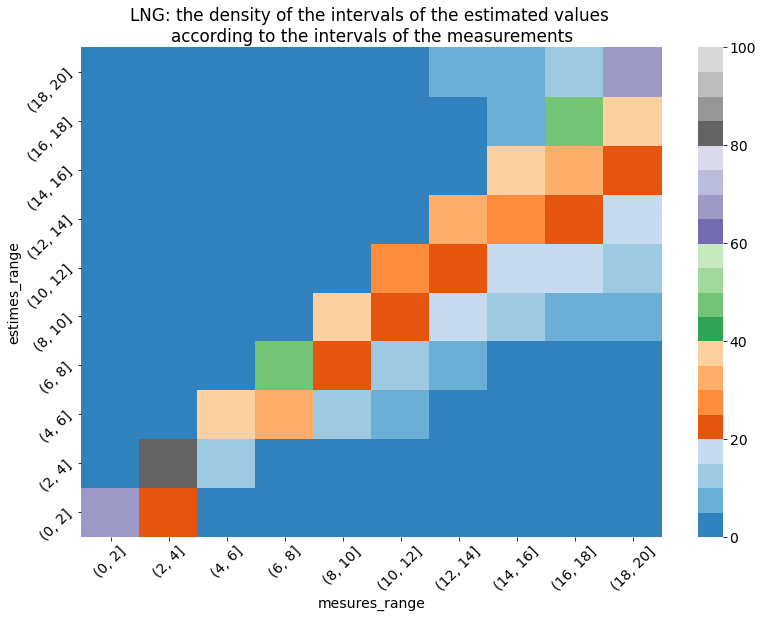

In [136]:
import seaborn as sns

fig, ax= plt.subplots(figsize=(13,9))
plt.rcParams['font.size']=14
sns.heatmap(data=pd_classed_prob2, annot=False, vmin=0, vmax=100, cmap='tab20c')
ax.invert_yaxis()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('LNG: the density of the intervals of the estimated values \naccording to the intervals of the measurements')

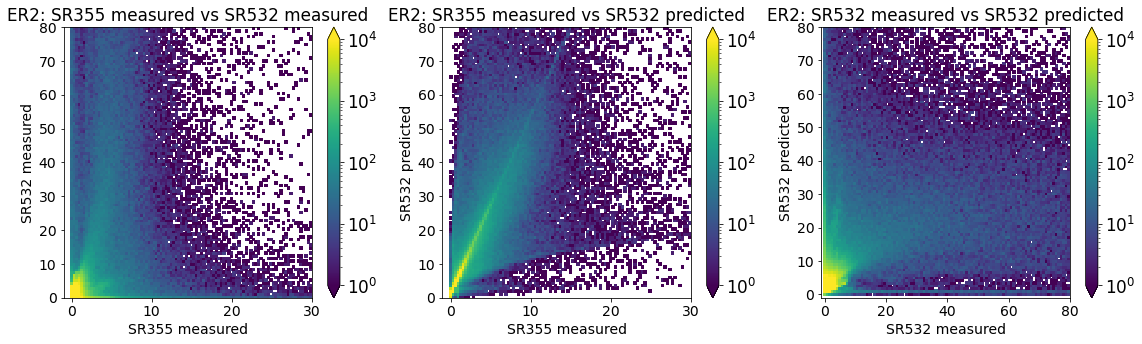

In [109]:
# histogram of  full dataset 
ranges = [[-1,30], [0,80]]
bins = 100
fg, (ax, ax1, ax2) = plt.subplots(ncols=3, figsize=(16,5))
h = ax.hist2d(reals355, reals, norm=LogNorm(vmax=1e4), range=ranges, bins=bins)
cb = plt.colorbar(h[3], ax=ax, extend='both')
ax.set(title='ER2: SR355 measured vs SR532 measured', ylabel='SR532 measured', xlabel='SR355 measured')
cb.ax.tick_params(labelsize='large')

h = ax1.hist2d(reals355,  predicts, norm=LogNorm(vmax=1e4), range=ranges, bins=bins)
cb = plt.colorbar(h[3], ax=ax1, extend='both')
ax1.set(title='ER2: SR355 measured vs SR532 predicted', ylabel='SR532 predicted', xlabel='SR355 measured')
cb.ax.tick_params(labelsize='large')

h = ax2.hist2d(reals, predicts, norm=LogNorm(vmax=1e4), bins=bins, range=[[-1,80], [-1,80]])
cb = plt.colorbar(h[3], ax=ax2, extend='both')
ax2.set(title=f'ER2: SR532 measured vs SR532 predicted', ylabel='SR532 predicted', xlabel='SR532 measured')
cb.ax.tick_params(labelsize='large')

plt.tight_layout()

In [161]:
measured_classes = pd.interval_range(start=0, end=80, freq=2)
pd_classed = pd.DataFrame(np.array([reals, predicts]).T, columns=['mesures', 'estimes'])
pd_classed['mesures_range'] = pd.cut(pd_classed['mesures'], measured_classes)
# pd_classed['estimes_range'] = pd.cut(pd_classed['estimes'], measured_classes)
# pp_classed = pd_classed.groupby(["mesures_range", 'estimes_range']).size()
from sklearn.metrics import mean_squared_error
def rmse( g ):
    rmse = np.sqrt( mean_squared_error( g['mesures'], g['estimes'] ) )
    return pd.Series(rmse)


new_pd_classed = pd_classed.groupby("mesures_range", as_index=False).apply(rmse)
# new_pd_classed = pd.DataFrame(new_pd_classed, columns=['mesures_range', 'rmse'])

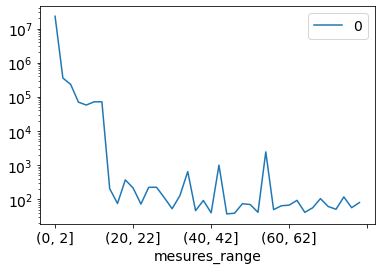

In [172]:
plt.figure(figsize=)
new_pd_classed.plot(x='mesures_range')
plt.yscale('log')

<AxesSubplot:ylabel='Probability'>

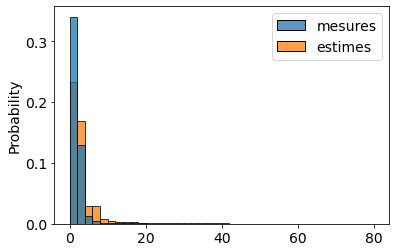

In [144]:
sns.histplot(data=pd_classed, binwidth=2, binrange=[0,80], stat='probability')

### PROFILS PLOTS

In [149]:
def find_nearest(array, value):
    idt = (np.abs(array - value)).argmin()
    value = array[idt]
    return idt, value
listfiles = sorted(Path('/homedata/nmpnguyen/LNG/NETCDF/').glob('*.nc'))
listfiles

[PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210908_F5_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210910_F6_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F8_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210914_F9_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210916_F10_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210917_F11_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210918_F12_rg_err_ntirs100.nc'),
 PosixPath('/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210919_F13_rg_err_ntirs100.nc')]

In [184]:
listfiles = sorted(Path('/homedata/nmpnguyen/LNG/NETCDF/').glob('*.nc'))
for i in range(1,len(listfiles))[1:2]: #len(listfiles)
    print(listfiles[i])
    path355 = Path('/homedata/nmpnguyen/LNG/test_Artem', f'{listfiles[i].stem}_dataset355_v2.nc')
    path532 = Path('/homedata/nmpnguyen/LNG/test_Artem', f'{listfiles[i].stem}_dataset532_v2.nc')
    if path355.is_file() & path532.is_file():
        print(f'{path355} and {path532} is found')
    
        new_d = xr.open_dataset(path355)
        new_dd = xr.open_dataset(path532)
        d = xr.open_dataset(listfiles[i], decode_cf=False)

        coords = {
            'time' : d['Time'].values,
            'height' : d['Height'].values,
        }

/homedata/nmpnguyen/LNG/NETCDF/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100.nc
/homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100_dataset355_v2.nc and /homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100_dataset532_v2.nc is found


In [185]:
new_d

<xarray.Dataset>
Dimensions:  (height: 3500, time: 2394)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 2387 2388 2389 2390 2391 2392 2393
  * height   (height) int64 0 1 2 3 4 5 6 ... 3493 3494 3495 3496 3497 3498 3499
Data variables:
    MPAB     (time, height) float32 ...
    PPAB     (time, height) float32 ...
    PAB      (time, height) float32 ...
    PerpAB   (time, height) float32 ...
    MMB      (time, height) float32 ...
    MME      (time, height) float32 ...
    T2mol    (time, height) float32 ...
    Height   (time, height) float32 ...
    Time     (time) float32 ...
    MPB      (time, height) float32 ...
    MPE      (time, height) float64 ...
    SR355    (time, height) float32 ...
Attributes:
    Level:        L1_TEMP
    Description:  LNG L0 concatenated HSR and DET DATA - LNG data - 532, 1064...
    created:      20220128
    Author:       quitterie.cazenave@latmos.ipsl.fr
    Campaign:     CADDIWA
    Day:          20210911
    Flight:       7
    Thermo:       ERA5
    Angles:       Lidar angles: validated with ground echo

(0.1, 1000.0)

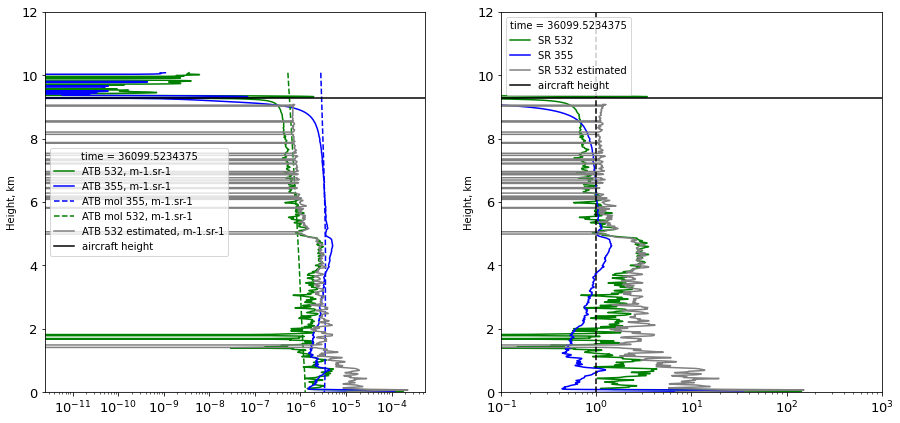

In [194]:
idt = find_nearest(coords['time'], 36100)[0]

ylim = (0,12)

%matplotlib inline
fig, (ax, ax2) = plt.subplots(figsize = (15,7), ncols=2)
xlim = None#(1e-7, 1e-3)
ax.semilogx((new_dd['ATB']).isel(time = idt), coords['height'][idt,:], label='ATB 532, m-1.sr-1', color='g')
ax.semilogx((new_d['PAB']+new_d['PerpAB']).isel(time = idt), coords['height'][idt,:], label='ATB 355, m-1.sr-1', color='b')

ax.semilogx((new_d['MMB']*new_d['T2mol']).isel(time = idt), coords['height'][idt,:], label='ATB mol 355, m-1.sr-1', color='b', linestyle='--')
ax.semilogx((new_dd['MMB']*new_dd['T2mol']).isel(time = idt), coords['height'][idt,:], label='ATB mol 532, m-1.sr-1', color='g', linestyle='--')

ax.semilogx(((new_dd['MMB']+new_d['MPB'])*new_dd['T2_total']).isel(time = idt), coords['height'][idt,:], label='ATB 532 estimated, m-1.sr-1', color='grey')
# ax.semilogx((new_dd['MMB']*new_dd['T2_532']).isel(time = idt), coords['height'][idt,:], label='ATB mol 532 estimated, m-1.sr-1', color='grey', linestyle='--')

ax.axhline(d['Aircraft_Altitude'].values[idt], color = 'k', label = 'aircraft height')
# ax.axvline(1, color= 'k', linestyle='--')
ax.legend(title=f'time = {coords["time"][idt]}')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set(ylabel='Height, km')
ax.tick_params(axis = 'both', labelsize=13)

xlim = (1e-1, 1e3)
ax2.semilogx((new_dd['SR532']).isel(time = idt), coords['height'][idt,:], label='SR 532', color='g')
ax2.semilogx((new_d['SR355']).isel(time = idt), coords['height'][idt,:], label='SR 355', color='b')
ax2.semilogx((new_dd['SR532_estimated']).isel(time = idt), coords['height'][idt,:], label='SR 532 estimated', color='grey')
ax2.axhline(d['Aircraft_Altitude'].values[idt], color = 'k', label = 'aircraft height')
ax2.axvline(1, color= 'k', linestyle='--')

ax2.legend(loc='upper left', title=f'time = {coords["time"][idt]}')
ax2.set_ylim(ylim)
ax2.set(ylabel='Height, km')
ax2.tick_params(axis = 'both', labelsize=13)
ax2.set_xlim(xlim)

[636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653
 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671
 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689
 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707
 708 709 710 711 712 713 714 715 716 717 718 719]


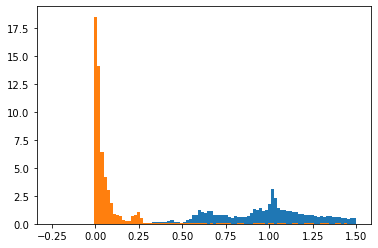

In [227]:
zcalib = np.where((coords['height'][idt,:] < d.Aircraft_Altitude[idt].values-3.0) & (coords['height'][idt,:] > d.Aircraft_Altitude[idt].values-0.5-3.0))[0]
print(zcalib)
zone_idt = np.where(coords['time'] < 36000)[0] #np.where(coords['time'] > 43000)[0]
plt.hist(((new_d['PAB']+new_d['PerpAB']).isel(time=zone_idt ,height=zcalib)/(new_d['MMB']*new_d['T2mol']).isel(time=zone_idt, height=zcalib)).values.ravel(),
        bins=100, range=[-0.25,1.5], density=True)
plt.grid()

zone_idt = np.where(coords['time'] > 43000)[0]
plt.hist(((new_d['PAB']+new_d['PerpAB']).isel(time=zone_idt ,height=zcalib)/(new_d['MMB']*new_d['T2mol']).isel(time=zone_idt, height=zcalib)).values.ravel(),
        bins=100, range=[-0.25,1.5], density=True)
plt.grid()

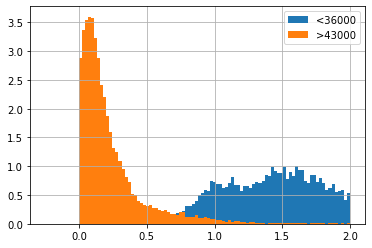

In [231]:
zone_idt = np.where(coords['time'] < 36000)[0] #np.where(coords['time'] > 43000)[0]
fig, ax = plt.subplots()
ax.hist((new_dd['ATB'].isel(time=zone_idt ,height=zcalib)/(new_dd['MMB']*new_dd['T2mol']).isel(time=zone_idt, height=zcalib)).values.ravel(),
        bins=100, range=[-0.25,2.0], density=True, label='<36000')

zone_idt = np.where(coords['time'] > 43000)[0]
ax.hist((new_dd['ATB'].isel(time=zone_idt ,height=zcalib)/(new_dd['MMB']*new_dd['T2mol']).isel(time=zone_idt, height=zcalib)).values.ravel(),
        bins=100, range=[-0.25,2.0], density=True, label='>43000')
ax.legend()
ax.grid()

### HEATMAP

In [167]:
measured_classes = pd.interval_range(start=0, end=10, periods=5)
measured_classes

IntervalIndex([(0, 2], (2, 4], (4, 6], (6, 8], (8, 10]], dtype='interval[int64, right]')

In [169]:
listfiles = sorted(Path('/homedata/nmpnguyen/LNG/NETCDF/').glob('*.nc'))
for i in range(len(listfiles)): #len(listfiles)
    path355 = Path('/homedata/nmpnguyen/LNG/test_Artem', f'{listfiles[i].stem}_dataset355.nc')
    path532 = Path('/homedata/nmpnguyen/LNG/test_Artem', f'{listfiles[i].stem}_dataset532.nc')
    if path355.is_file() & path532.is_file():
        print(f'{path355} and {path532} is found')
    
        new_d = xr.open_dataset(path355)
        new_dd = xr.open_dataset(path532)

/homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210908_F5_rg_err_ntirs100_dataset355.nc and /homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210908_F5_rg_err_ntirs100_dataset532.nc is found
/homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210910_F6_rg_err_ntirs100_dataset355.nc and /homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210910_F6_rg_err_ntirs100_dataset532.nc is found
/homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100_dataset355.nc and /homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F7_rg_err_ntirs100_dataset532.nc is found
/homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F8_rg_err_ntirs100_dataset355.nc and /homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210911_F8_rg_err_ntirs100_dataset532.nc is found
/homedata/nmpnguyen/LNG/test_Artem/LNG_HSRL_RAW_L1_TEMP_CADDIWA_20210914_F9_rg_err_ntirs100_dataset3

In [ ]:
mesures = (new_dd['ATB']/new_dd['MMB']).values.ravel()
estimes = new_dd['SR532_estimated'].values.ravel()
pd_measured = pd.DataFrame(np.array([mesures[np.isfinite(mesures)], estimes[np.isfinite(mesures)]]).T, 
                           columns=['mesures', 'estimes'])
pd_measured

In [ ]:
pd_measured['mesures_range'] = pd.cut(pd_measured['mesures'], measured_classes)
pd_measured['estimes_range'] = pd.cut(pd_measured['estimes'], measured_classes)

In [ ]:
pp = pd_measured.groupby(["mesures_range", 'estimes_range']).size()
pp = pp.unstack(0)
print(pp)

In [ ]:
measured_classes = pd.interval_range(start=0, end=60, freq=5)
pd_measured['mesures_range'] = pd.cut(pd_measured['mesures'], measured_classes)
pd_measured['estimes_range'] = pd.cut(pd_measured['estimes'], measured_classes)
pp1 = pd_measured.groupby(["mesures_range", 'estimes_range']).size()
pp1 = pp1.unstack(0)
pp1

In [ ]:
pp2 = pp1
for i in range(pp1.shape[0]):
    pp2.iloc[i] = 100*pp1.iloc[i]/pp1.iloc[i].sum()
    
pp2

In [ ]:
import seaborn as sns

fig, (hm, hm2) = plt.subplots(figsize=(13,9))
plt.rcParams['font.size']=14
hm = sns.heatmap(data=pp1, annot=True, vmin=0, vmax=100, cmap='tab20c')
ax.invert_yaxis()
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [ ]:
with open('/homedata/nmpnguyen/LNG/test_Artem/output.txt')